# Miniproject 2

first name: Mert

last name: Ertugrul

sciper: 319933

date: 29.03.2020

*Your teammate*

first name of your teammate:  Alexander

last name of your teammate:  Möllers

sciper of your teammate: 325293


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.

** Remember **

If you are asked for plots: The appearance of the plots (labelled axes, ** useful scaling **, etc.) is important!

If you are asked for discussions: Answer in a precise way and try to be concise. 


** Submission **

Rename this notebook to Miniprojet2_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

** Link to the exercise **

https://lcn-neurodynex-exercises.readthedocs.io/en/latest/exercises/hopfield-network.html

## \* \* \* \* Programming Notes : Copying and slicing lists and numpy arrays \* \* \* \*
We would like to take the opportunity to bring to your attention certain features of Python, that might lead to unwanted behaviour and serious mistakes, if one is not aware of them. 
Please check the Python Cheat Sheet file on the moodle (https://moodle.epfl.ch/mod/page/view.php?id=981134 Part 4 of the ipynb file) for some examples of the following notes:

* Assigning a list to a new variable does not create a copy of the list, but creates a variable that points to the list. This means that modifying the second variable, also modifies the original list.
* Assigning a slice of a list to a new variable, creates a copy of the list. Any modification to the sliced list does not modify the original.

Now when it comes to numpy arrays:
* Assigning a numpy array to a new variable does not create a copy of the array, but creates a variable that points to the array. This means that modifying the second variable, also modifies the original array. (same as above)
* Assigning a slice of a numpy array to a new variable creates a variable that points to the corresponding elements of the original array as well! (contrary to what we saw above!) This means that modifying the second variable, also modifies the original array!
* To copy the original array and ensure that it is not modified by any modification of its copied version, the method copy() should be used.

# PART 1: Coronavirus, epidemiology  and neural networks  [75 points]
In this exercise we will study the Coronavirus pandemic. This worldwide epidemy (left figure) is to be taken seriously and these exercise are made to show you the importance of acting fast and hard. You can follow the evolution in real time on the following [website](https://ncov2019.live/data).
One key action we can do is what has been called flatten the curve (right figure):
<div>
<img align='right' src="https://ourworldindata.org/uploads/2020/03/Flattening-the-curve-3-2048x1434.png" alt="drawing" width="400"/>
<img align='left' src="https://i.insider.com/5e6f8ee1c48540116e247a42?width=2500&format=jpeg&auto=webp" alt="drawing" width="350"/>
</div>

How and why flattenning this curve is important has been explained in Wulfram's extra [presentation](https://drive.switch.ch/index.php/s/fIkyRGPbepHOoDc). In this exercise we simulate the [SIR model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology) a well known and fairly understable model in epidemiology. 

First run the code running simulating the fitzhugh_nagumo equations below to make sure everything is installed properly on your computer.

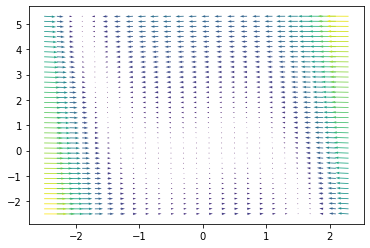

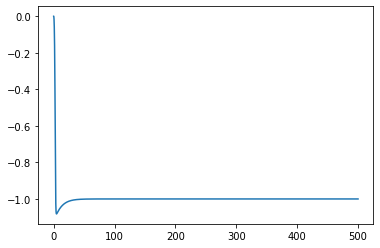

In [2]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.phase_plane_analysis import fitzhugh_nagumo
import matplotlib
import networkx as nx 
import matplotlib.pyplot as plt 
import tqdm
fitzhugh_nagumo.plot_flow()
fixed_point = fitzhugh_nagumo.get_fixed_point()
plt.figure()
trajectory = fitzhugh_nagumo.get_trajectory()
plt.plot(trajectory[0], trajectory[1])

# Exercise 1.1 SIR phase plane [8 points]
Now we start the real work! The module [`neurodynex3.phase_plane_analysis.fitzhugh_nagumo `](https://lcn-neurodynex-exercises.readthedocs.io/en/latest/modules/neurodynex3.phase_plane_analysis.html) allows us to compute the phase plane flow of fitzhugh_nagumo equations.We are going to use it to plot the SIR model behavior.\
The SIR model can be written as follow:

$\frac{dI}{dt} = \frac{\beta}{N}SI - \gamma I$\
$\frac{dS}{dt} = - \frac{\beta}{N}SI$

1.1.1 Give an intuition behind the constants $\beta$ and $\gamma$ [2 points] (< 2 lines)

1.1.2 We often hear about the $R_0$ of an epidemy, in the SIR model $R_0 = \frac{\beta}{\gamma}$ Give an intuition behind this constant. [2 points] (< 2 lines)

1.1.3 Copy the function [`plot_flow()`](https://lcn-neurodynex-exercises.readthedocs.io/en/latest/modules/neurodynex3.phase_plane_analysis.html), replace the fitzhugh nagumo model by the SIR model and plot the flow. [4 points]


1.1.1 Answer:

$\beta$ : the factor of spreading - the probability of an infected person infecting another person in unit time upon encounter

$\gamma$ : rate of recovery (decay rate) for infected population

1.1.2 Answer :

Since $\gamma$ is the rate of recovery, $\frac{1}{\gamma}$ is the duration of infection. When $\beta$ -the spread factor per unit time- is multiplied by infection duration, we get $R_0$ representing the number of people an infected person can infect before recovery.

1.1.3 Answer:

In [4]:
#1.3 plot flow
gamma = 1.0/20
beta = 3.5 * gamma
N = 1e7


def plot_flow(gamma=1.0/20, beta = 3.5 * 1.0/20, N = 1e7):
    """Plots the phase plane of the SIR model
    for given model parameters.

    Args:
        gamma: rate of recovery 
        beta: factor of spreading
        N: population
    """

    # define the interval spanned by infected pop. i and susceptable pop. s
    # to produce the phase plane
    ii = np.arange(0, N, 0.04*N)
    ss = np.arange(0, N, 0.04*N)
    (SS, II) = np.meshgrid(ss, ii)

    # Compute derivative of i and s according to SIR equations
    # and velocity as vector norm
    dI = SS*II*beta/N - gamma*II
    dS = -SS*II*beta/N
    vel = np.sqrt(dI**2 + dS**2)

    # Use quiver function to plot the phase plane
    plt.quiver(SS, II, dS, dI, vel)
       

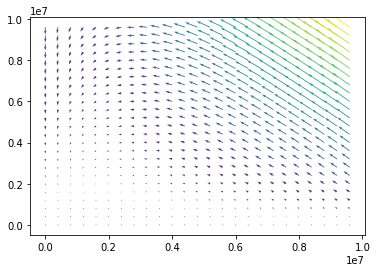

In [5]:
plot_flow(gamma, beta, N)

# Exercise 1.2 SIR Trajectory [15 points]
In order to plot the trajectory of a given initial condition we use a simple [forward euler](http://web.mit.edu/10.001/Web/Course_Notes/Differential_Equations_Notes/node3.html) to solve the SIR model over time.

#### for all 1.2 questions we use $\gamma = \frac{1}{20}$, $I_0 = 100$ and $N=10^7$


1.2.1 Fill the question marks in the function `get_trajectory()` below so that the function returns the trajectory $(S(t), I(t))$ from an initial point $S_0$, $I_0$.  (initial number of non infected/infected)[7 points]

1.2.2 Plot on the same graph the phase plane trajectory of an epidemy for given $R_0$s and $I_0$. [2 points]

1.2.3 Plot on the same graph the evolution on infected people over time for given $R_0$s and $I_0$. [2 points]

Flattening the curve allows to avoid high peak of infected people at the same time. Here, we want to show that acting on $R_0$ allows great flattening of the curve.

1.2.4 Add on the graph of 1.2.3 an horizontal line showing a theoretical 10% of the population hospital saturation threshold. [1 point]

1.2.5 Comment [3 points] (< 3 lines)

In [6]:
## 1.2.1
def get_trajectory(gamma = 0.05, R0 = 10, I0 = 100, N = 1e7 , tend=1000):
    record = {}
    record['t'] = []
    record['I'] = []
    record['S'] = []
    record['R'] = []
    beta = R0*gamma
    dt = 0.1 
    S = N-I0
    I = I0
    for i in range(tend):
        for step in range(int(1/dt)):   

            record['t'] += [i + step*dt]
            record['I'] += [I]
            record['S'] += [S]
            record['R'] += [N-I-S]
            dIdt = ( S*I*beta/N - gamma*I )*dt
            dSdt = ( -S*I*beta/N )*dt
            new_S = S + dSdt
            new_I = I + dIdt
            S = new_S
            I = new_I
            

            
    return np.array([np.array(record['t']),np.array(record['S']),np.array(record['I'])])


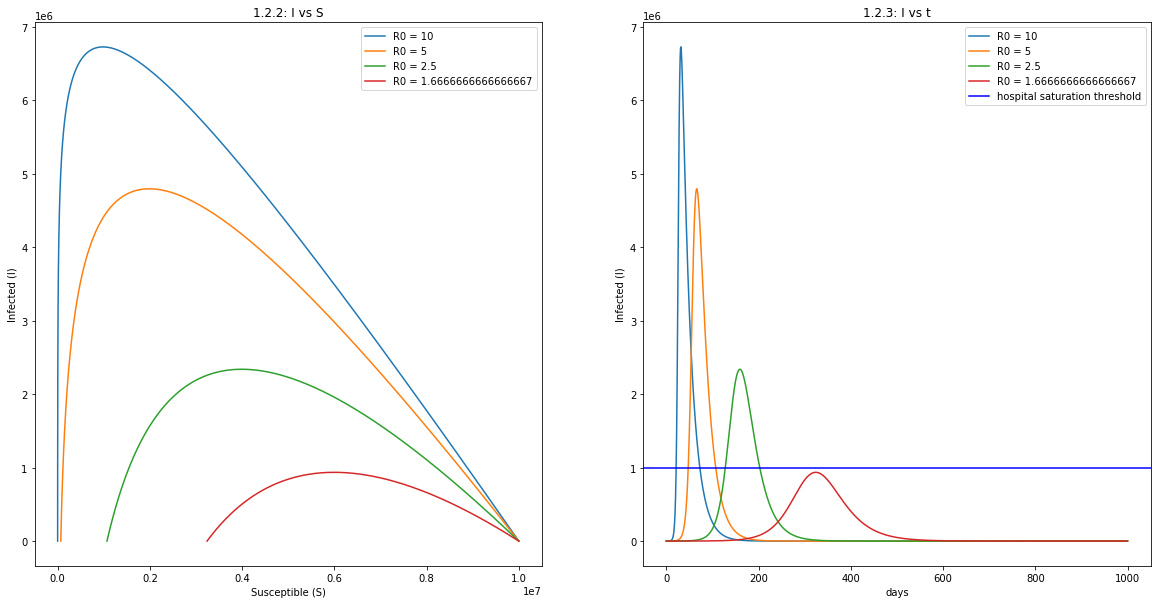

In [18]:
## 1.2.2, 1.2.3 and 1.2.4
N = 1e7
I0 = 100
R0s = [10,5,5/2,5/3]


figure, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

#1.2.2
for R0 in R0s:
    trajectory = get_trajectory( gamma = 0.05, R0 = R0, I0 = I0, N = N, tend=1000 )
    ax1.plot(trajectory[1], trajectory[2], label="R0 = "+str(R0))
    ax1.set_title('1.2.2: I vs S')
    ax1.set_xlabel("Susceptible (S)")
    ax1.set_ylabel("Infected (I)")
    
    #1.2.3
    ax2.plot(trajectory[0], trajectory[2], label="R0 = "+ str(R0))
    ax2.set_title('1.2.3: I vs t')
    ax2.set_xlabel("days")
    ax2.set_ylabel("Infected (I)")
    
#1.2.4
ax2.axhline(y=0.1*N, color='b', linestyle='-', label= "hospital saturation threshold")
ax1.legend()
ax2.legend()

plt.show()



Answer of 1.2.5

We see that as the reproduction rate is lowered, both the total number of infections throughout the epidemic and the number of infected people at any given time decrease. As a result, the infected population at the instance of the peak of the epidemic can be lowered below hospital saturation threshold with a low enough R0= 1.67, flattening the curve over a larger time period.

# Exercise 1.3 SIR Analysis [18 points]

Now that you are a bit familiar with the SIR model, we want to do a bit of analysis over the parameters. Every action (or policies), done by a government allows to act on the $R_0$ of the model.  
- First, we want you to run trajectories for different actions of a government. We consider an action when the government acts on $R_0$ for a given time, e.g. quarantine of the population.

#### for all 1.3 questions we use $\gamma = \frac{1}{20}$, $I_0 = 100$ and $N=10^7$

1.3.1 Update the `get_trajectory` function so that $R_0$ can change during the simulation (look at the modulation dictionary), now `get_trajectory` should return the maximum of the infected peak. [2 points]

1.3.2 Run the trajectories for a policy $R_0$ from $2.3$ (estimated value of $R_0$ for no actions) to $0.5$ (strong quarantine policy) and time of policy from $1$ to $200$ days. [2 points]

1.3.3 Plot the 2D matrix of maximum infected cases obtained in question 1.3.2. On the x axis we want the duration of quarantine, and $R_0$ on the y axis. Comment [2 + 3 points] (< 3 lines)

1.3.4 In question 1.3.2 we consider that people go back to their usual life at the end of the quarantine $R_0$ back to $2.3$. Now add a transition phase where people are "careful", $R_0$ of $1.5$ for 150 days, do you see any difference? [2 points] (< 1 line)

Now we study the impact of a delay in the intervention after the outbreak. In other words, we want to know how long we can wait before a government takes actions.

1.3.5  Run the trajectories for a policy $R_0$ from $2.3$ (estimated value of $R_0$ for no actions) to $0.5$ (strong quarantine policy) and time $\textbf{before we start the quarantine}$ from $1$ to $200$ days. In this question we consider a quarantine duration of 50 days. Plot the 2D matrix of maximum infected cases. On the x axis we want the time before the start of quarantine, and $R_0$ on the y axis. $\textbf{For both careful and non careful population}$.
Comment [2 + 3 points] (< 3 lines)

1.3.6 Design a government policy so that the amount of infected people never goes above 6% of the population, $\textbf{for both careful and non careful population}$ Comment. [2 points] (< 2 lines)

$\textbf{Constraints:}$ 
1. Max quarantine time 50 days with min $R_0 = 0.5$
2. For careful transition max time $100$ days and min $R_0= 1.5$. 

In [7]:
## 1.3.1
def get_trajectory2(gamma, R0, I0, N, tend=1000, modulation = False):
    record = {}
    record['t'] = []
    record['I'] = []
    record['S'] = []
    record['R'] = []
    beta =  R0*gamma
    dt = 0.1 ## forward euler time step
    S = N-I0
    I = I0
    for i in range(tend):
        if modulation:
            beta = modulation["R0"][ np.sum( i >= np.cumsum(modulation["days"]) ) ]*gamma          
        for step in range(int(1/dt)):   

            record['t'] += [i + step*dt]
            record['I'] += [I]
            record['S'] += [S]
            record['R'] += [N-I-S]
            dIdt = ( S*I*beta/N - gamma*I )*dt
            dSdt = ( -S*I*beta/N )*dt
            new_S = S + dSdt
            new_I = I + dIdt
            S = new_S
            I = new_I
            
            
    return max(record['I'])

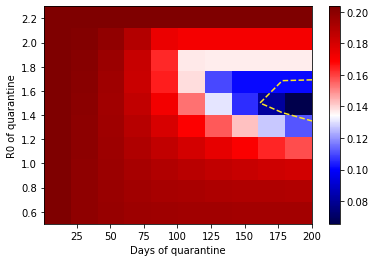

In [9]:
# 1.3.2 + 1.3.3
N =1e7
R0s = np.linspace(2.3,0.5,10)
policy_days = np.linspace(1,200,10)
I0 = 100
modulation = {}

#initializing the 2D matrix of maximum infected cases 
Res = np.zeros((len(R0s),len(policy_days)))

for y in range(Res.shape[0]):
    for x in range(Res.shape[1]):
        
        #modulation['days'] stands for the number of days with stay in a given policy
        modulation['days'] = [100, policy_days[x] , 1000 - policy_days[x] - 100 ]  ### run always 1000 time steps
        #modulation['r0'] stands for the strength of a given policy
        modulation['R0'] = [2.3, R0s[y], 2.3]
        
        #filling the 2D matrix for infection peaks, since plt.contour uses 0.1, we normalized the values by total  pop.
        Res[y,x] = get_trajectory2( gamma=1.0/20, R0=2.3, I0=I0, N=N, tend=1000, modulation = modulation)/N

plt.imshow(Res,extent=[policy_days[0],policy_days[-1],R0s[-1],R0s[0]],aspect = 'auto',cmap ='seismic')
plt.xlabel('Days of quarantine')
plt.ylabel('R0 of quarantine')
plt.colorbar()
plt.contour(policy_days,R0s,Res,[0,0.1],linestyles = 'dashed') ## shows 10% contour
plt.show()

Answer 1.3.3:
Although one may expect the strictest quarantine to be the most effective, for this simulation we see that this is not the case. The considerably low gamma means that for a quarantine up to 200 days, the benefits of any strict quarantine will be erased after the quarantine as a new excursion will occur, but a slightly less strict quarantine will allow a buildup of herd immunity that will give better results.

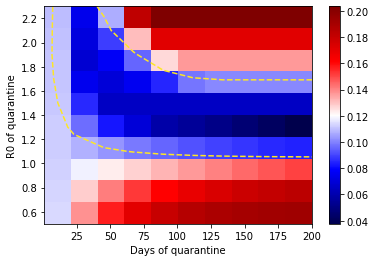

In [10]:
# 1.3.4
N =1e7
R0s = np.linspace(2.3,0.5,10)
policy_days = np.linspace(1,200,10)

#initializing the 2D matrix of maximum infected cases 
Res = np.zeros((len(R0s),len(policy_days)))

modulation = {}

for y in range(Res.shape[0]):
    for x in range(Res.shape[1]):

        #modulation['days'] stands for the number of days with stay in a given policy
        modulation['days'] = [100,policy_days[x],150,1000 - policy_days[x]-250]  ### run always 1000 time steps
        #modulation['r0'] stands for the strength of a given policy
        modulation['R0'] = [2.3,R0s[y],1.5,2.3]
        
        #filling the 2D matrix for infection peaks, since plt.contour uses 0.1, we normalized the values by total  pop.
        Res[y,x] = get_trajectory2( gamma=1.0/20, R0=2.3, I0=I0, N=N, tend=1000, modulation = modulation)/N
        
plt.imshow(Res,extent=[policy_days[0],policy_days[-1],R0s[-1],R0s[0]],aspect = 'auto',cmap ='seismic')
plt.xlabel('Days of quarantine')
plt.ylabel('R0 of quarantine')
plt.colorbar()
plt.contour(policy_days,R0s,Res,[0,0.1],linestyles = 'dashed') ## shows 10% contour
plt.show()


Answer 1.3.4: 

For the middle horizontal band of the matrix, peaks dramatically decrease. For R0>1.4, shorter and even quite relaxed quarantines become feasible.

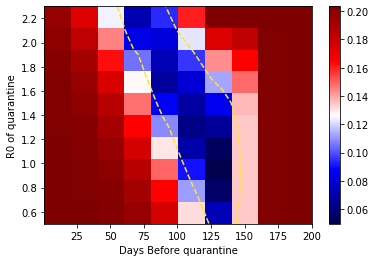

In [11]:
# 1.3.5
#Since a time was not given for the careful phase, it was kept the same as before, while full quaratine is changed to 50 days
N =1e7
R0s = np.linspace(2.3,0.5,10)
policy_days = np.linspace(1,200,10)

#initializing the 2D matrix of maximum infected cases 
Res = np.zeros((len(R0s),len(policy_days)))

modulation = {}

for y in range(Res.shape[0]):
    for x in range(Res.shape[1]):

        #modulation['days'] stands for the number of days with stay in a given policy
        modulation['days'] = [policy_days[x],50,150,1000 - policy_days[x]-200]  ### run always 1000 time steps
        #modulation['r0'] stands for the strength of a given policy
        modulation['R0'] = [2.3,R0s[y],1.5,2.3]
        
        #filling the 2D matrix for infection peaks, since plt.contour uses 0.1, we normalized the values by total  pop.
        Res[y,x] = get_trajectory2( gamma=1.0/20, R0=2.3, I0=I0, N=N, tend=1000, modulation = modulation)/N
        
plt.imshow(Res,extent=[policy_days[0],policy_days[-1],R0s[-1],R0s[0]],aspect = 'auto',cmap ='seismic')
plt.xlabel('Days Before quarantine')
plt.ylabel('R0 of quarantine')
plt.colorbar()
plt.contour(policy_days,R0s,Res,[0,0.1],linestyles = 'dashed') ## shows 10% contour
plt.show()

Answer 1.3.5:

As the quarantine is delayed (gov't acts late), stricter quarantine measures become necessary and worthwhile even though they were not useful for earlier scenarios. A quarantine that started and ended too early will fail to stop the eventual excursion that comes after the measures while a response later than approximately 180 days will fail. A peak above 10% will have occured already. Every R0 combination is feasible here at a certain response time.

In [12]:
# 1.3.6

N =1e7
R0q =1.1
R0c =1.5
q_days =50
c_days =100
before_days = 170
after_days = 1000 - q_days - c_days - before_days 

modulation = {}

#modulation['days'] stands for the number of days with stay in a given policy
modulation['days'] = [before_days, q_days, c_days, after_days]  ### run always 1000 time steps
#modulation['r0'] stands for the strength of a given policy
modulation['R0'] = [2.3,R0q,R0c,2.3]
        
result = get_trajectory2( gamma=1.0/20, R0=2.3, I0=I0, N=N, tend=1000, modulation = modulation)/N
        
print("Government policy: \n quarantine R0: ",R0q, \
       "\n Careful period R0: ",R0c, \
       "\n Period Before Quarantine: ",before_days, " days",\
       "\n Period of Full Quarantine: ",q_days, " days",\
       "\n Careful Period: ",c_days, " days",\
       "\n Peak Percentage of Infections in a day:  ",result*100,"% < 6% , policy successfull.")

Government policy: 
 quarantine R0:  1.1 
 Careful period R0:  1.5 
 Period Before Quarantine:  170  days 
 Period of Full Quarantine:  50  days 
 Careful Period:  100  days 
 Peak Percentage of Infections in a day:   18.842945766089763 % < 6% , policy successfull.


Answer 1.3.6:

The results of the previous parts were used to find an appropriate policy. The range of 150-175 days before quarantine give flexibility as seen in 1.3.4, and the quarantine & careful R0s were selected based on the optimum of 1.3.4. This policy is just enough that the post-quarantine excursion never reaches 6%.

# Exercise 1.4 Model infections with Networks [15 points]

So far we have studied a simple model of infection. This model is a simplification of propagation of an infection in a fully connected graph. We are now going to implement two types of graph and compare the results to the SIR model.
For this we need the python library [networkx](https://networkx.github.io/) and for comfort [tqdm](https://pypi.org/project/tqdm/)
(simply use pip install networkx and pip install tqdm in your terminal).

The study of the graphs allows a better understanding of the [importance of social distancing](https://corona.katapult-magazin.de/).
<div>
 <figure style="width:50%;
    float:left;
    margin:0px;
    text-align:center;
    padding:0px;" >
  <img src="https://upload.wikimedia.org/wikipedia/commons/1/13/Erdos_generated_network-p0.01.jpg">
  <figcaption >Example Erdős–Rényi graph.</figcaption>
</figure> 
 <figure style="width:50%;
    float:left;
    margin:0px;
    text-align:center;
    padding:0px;" >
  <img style="width:50%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/18-vertex_zero-symmetric_graph.svg/200px-18-vertex_zero-symmetric_graph.svg.png">
  <figcaption >Example of a K-connected graph.</figcaption>
</figure> 
   </div>

1.4.1 In the part we implement 2 different graphs:
- Erdős–Rényi graph: random connected graph, with sparsity $s$.
- random regular graph: random connected graph with $\textbf{exactly } K$ connections per neuron.

create the 2 graphs, with sparsity $s=0.1$ and $N=50$ nodes and plot it [1 point]
(keep this number of nodes more is really long to run).

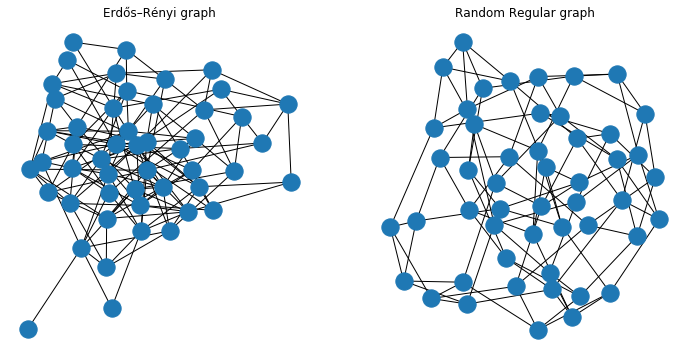

In [13]:
import tqdm
import networkx as nx 
N = 50
s = 0.1
G = nx.erdos_renyi_graph(N, s)
# d= (N-1)*s to keep the number of connections statistically the same for both models
G1 = nx.random_regular_graph(int((N-1)*s), N,0) 

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title("Erdős–Rényi graph")
nx.draw(G)

plt.subplot(122)
plt.title("Random Regular graph")
nx.draw(G1)
plt.show()



In order to simulate the propagation of a disease we consider that at each time step we run over the infected nodes. Each infected node $n_1$ can infect a susceptible connected node $n_2$ with probability:

$P(n_2 = S\rightarrow n_2 = I|n_1 = I) = \frac{\beta \Delta_t}{N\cdot s}$.

$P(n_2 = S\rightarrow n_2 = I|n_1 = S) = 0$,

where s is the sparsity of the network. Each infected node $n_1$ has the probability to be cured:

$P(n_1 = I\rightarrow n_1 = C) = \gamma  \Delta_t$

where $I$ stands for the infected node, $S$ the susceptible nodes and $C$ the cured ones.

1.4.2 Pen&pencil. Show that for a small $\Delta t$ and a fully connected graph with large $N$ the network behaves exactly as the SIR model. [3 points]

1.4.3 Fill the function `simulation_graph` according to the properties we defined in 1.4.2. [4 points]

1.4.4 Run the simulation for fully connected graphs of $N = 100$ nodes and show that you get quantitatively the same results as the SIR model. Run the graphs 10 times for 300 days and plot the average trajectory of infected cases against the SIR model. [3 points]

1.4.5 Run the simulation for sparsely connected graphs with $s=0.1$ and $N = 100$. Explain the differences/similarities you observed.\
[1 + 2 points]

1.4.6 What is the difference between an Erdős–Rényi graph and a K-connected one if $N\rightarrow \infty$. if they are fully connected ? if they are sparsely connected ? [2 points] (< 2 lines)

------------------------------------------------------------------

### Answer 1.4.2:

$P(n_2 = S\rightarrow n_2 = I) =\sum_{n_1}^{N\cdot s} \big(  P(n_2 = S\rightarrow n_2 = I|n_1 = I ) \cdot P( n_1 = I ) + P( n_2 = S\rightarrow n_2 = I|n_1 = S ) \cdot P( n_1 = S ) \big)$

Substituting in the following values:
- $P(n_2 = S\rightarrow n_2 = I|n_1 = S) = 0$ 
- $P(n_2 = S\rightarrow n_2 = I|n_1 = I) = \frac{\beta \Delta_t}{N\cdot s}$

 (here I and S refer to the size of the infected and susceptible populations when they are outside a probability expression:)

- $P(n = I) = \frac{I}{N\cdot s}$
- $P(n = S) = \frac{S}{N\cdot s}$

we get:

$P(n_2 = S\rightarrow n_2 = I) = \sum_{n_1}^{N\cdot s} \frac{\beta \Delta_t}{N\cdot s} \cdot \frac{I}{N\cdot s} = N\cdot s \cdot \frac{\beta \Delta_t}{N\cdot s} \cdot \frac{I}{N\cdot s} = \beta \Delta_t \cdot \frac{I}{N\cdot s} $

$P(S\rightarrow I) =  \sum_{n_2}^{N\cdot s} P(n_2 = S\rightarrow n_2 = I) \cdot P(n_2 = S) = N\cdot s\cdot \beta \Delta_t \cdot \frac{I}{N\cdot s} \cdot \frac{S}{N\cdot s} =  \beta \Delta_t \cdot \frac{I\cdot S}{N\cdot s}$ 

we have: 

$\frac{P(S\rightarrow I)}{\Delta_t} = \beta  \cdot \frac{I\cdot S}{N\cdot s}$

for large N, this signifies the rate of conversion from S to I per $\Delta_t$. For small $\Delta_t$ , we replace it by dt and the rate of change of S is the negative of this expression as conversion from S indicates a reduction of S:

  $\frac{\mathrm d S}{\mathrm d t} = -\beta \cdot \frac{I\cdot S}{N\cdot s}  \implies$ *Result 1*

Similarly for the probability to get cured:

$ P(I\rightarrow C) = \sum_{n_1}^{N\cdot s}P( n_1 = I )\cdot P(n_1 = I\rightarrow n_1 = C) = N\cdot s\cdot \frac{I}{N\cdot s} \cdot \gamma  \Delta_t =  I\cdot \gamma  \Delta_t$ 

Conversion from I to C is a negative contributor to the rate of change of I wihe conversion from S to I is postivite. For small 
$\Delta_t$, the rate of change of I becomes:

$\frac{\mathrm d I}{\mathrm d t} = \frac{P(S\rightarrow I)}{\Delta_t} + -\frac{P(I\rightarrow C)}{\Delta_t} $

$\frac{\mathrm d I}{\mathrm d t}= \beta \cdot \frac{I\cdot S}{N\cdot s} - I\cdot \gamma  \implies$ *Result 2*

Results 1 and 2 are the same equations that govern the behavior of S and I respectively in the SIR model, with the addition of a sparcity factor that we use for our networks.
               
-------------------------------------------------------------------------------------

### Answer 1.4.3:



In [15]:
# later in 1.5.4, it is stressed that the infected cases should be in the same cluster, 
# so the  infected people are placed by iterating from the beginning of the node list. 

def simulation_graph(G,I0,R0,sparsity,tend=1000 ,modulation = False):
    dt = 0.01
    gamma = 1/20
    R0s= []
    average = 10 # number of run  for averaging
    arr_I = np.zeros((average,tend)) #save all infection history over time for each average 
    arr_S = np.zeros((average,tend)) #save all susceptible history over time for each trial 
    
    for trial in range(average):
        I_t = []
        S_t = []
        infected = np.arange(I0)
        susceptible = np.arange(0,G.number_of_nodes())
        susceptible = [x for x in susceptible if x not in infected] # no infected in susceptible
        cured = []
        for i in tqdm.tqdm(range(tend)):
            if modulation:
                R0 = modulation["R0"][ np.sum( i >= np.cumsum(modulation["days"]) ) ]
            R0s += [R0]
            beta = R0*gamma
            for j in range(int(1/dt)):
                tmp_infected = infected.copy()
                tmp_cured = cured.copy()
                for node in G.adj: ## run over all connections of a node
                    if node in infected:
                        for S_node in G.adj[node] :
                            if np.random.rand()< beta*dt/(G.number_of_nodes()*sparsity) and S_node in susceptible :
                                tmp_infected = tmp_infected + [S_node]
                        if np.random.rand() < gamma*dt:
                            tmp_cured = tmp_cured + [node]
                infected  = [x for x in tmp_infected if x not in tmp_cured]
                susceptible = [x for x in susceptible if x not in tmp_infected]
                cured = tmp_cured
            
            I_t += [len(infected)]
            S_t += [len(susceptible)]
        arr_I[trial,:] = np.array(I_t)
        arr_S[trial,:] = np.array(S_t)
    
    return arr_S, arr_I

### 1.4.4: Fully Connected Graphs

We also plotted the I vs S graph to show additional information.

100%|██████████| 300/300 [00:18<00:00, 16.01it/s]


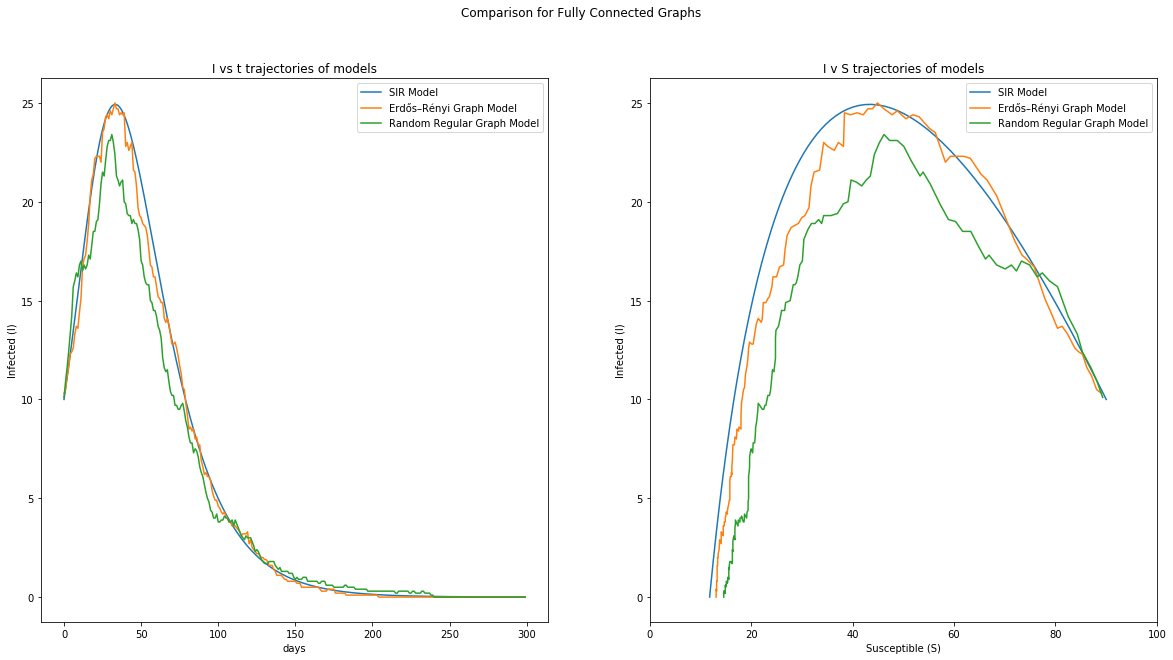

In [17]:
#1.4.4 
I0 = 10
N = 100
tend = 300
R0 = 2.3

#fully connected graphs
#Erdős–Rényi graph
G_ER = nx.erdos_renyi_graph(N, 1)
#Random Regular graph
G_RR = nx.random_regular_graph(N-1, N,0) 

S_ER, I_ER = simulation_graph(G_ER,I0,R0,sparsity=1,tend=tend ,modulation = False)
S_ER, I_ER = np.mean(S_ER, axis=0), np.mean(I_ER, axis=0)

S_RR, I_RR = simulation_graph(G_RR,I0,R0,sparsity=1,tend=tend ,modulation = False)
S_RR, I_RR = np.mean(S_RR, axis=0), np.mean(I_RR, axis=0)

#SIR Model
SIR_trajectory = get_trajectory(gamma = 0.05, R0 = R0, I0 = I0, N = N , tend=tend)
#subsampling since the functon get_trajectory outputs every incrementation of length dt
time = SIR_trajectory[0][0::10]

figure144, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))

#trajectory[0] : time axis (same for all models)
ax1.plot(time, SIR_trajectory[2][0::10], label="SIR Model")
ax1.plot(time, I_ER, label="Erdős–Rényi Graph Model")
ax1.plot(time, I_RR, label="Random Regular Graph Model")
ax1.set_title('I vs t trajectories of models')
ax1.set_xlabel("days")
ax1.set_ylabel("Infected (I)")

    
ax2.plot(SIR_trajectory[1][0::10], SIR_trajectory[2][0::10], label="SIR Model")
ax2.plot(S_ER, I_ER, label="Erdős–Rényi Graph Model")
ax2.plot(S_RR, I_RR, label="Random Regular Graph Model")
ax2.set_title('I v S trajectories of models')
ax2.set_xlabel("Susceptible (S)")
ax2.set_ylabel("Infected (I)")
ax2.set_xlim(0,N)

    
ax1.legend()
ax2.legend()
figure144.suptitle("Comparison for Fully Connected Graphs")
plt.show()


### 1.4.5: Sparsely Connected Graphs
I also plotted the I vs S graph to show additional information.

100%|██████████| 300/300 [00:04<00:00, 61.55it/s] 


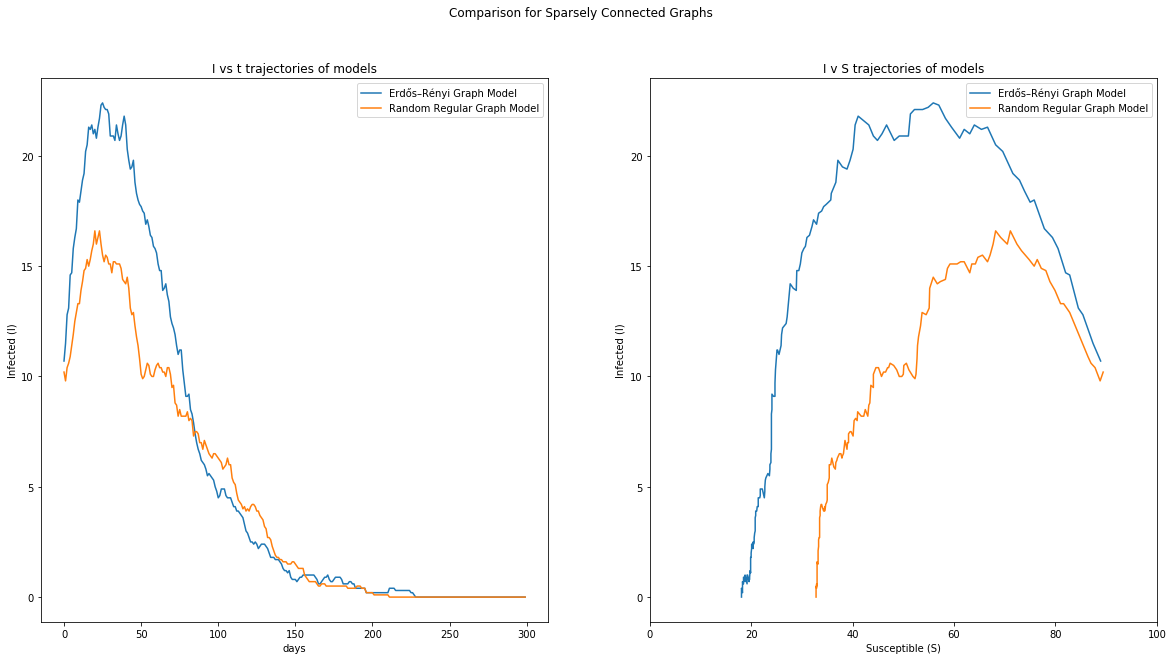

In [18]:
#1.4.5
I0 = 10
N = 100
tend = 300
R0 = 2.3
s = 0.1
time = np.arange(300)

#sparsely connected graphs
#Erdős–Rényi graph
G_ER = nx.erdos_renyi_graph(N, s)
#Random Regular graph
G_RR = nx.random_regular_graph(int(s*(N-1)), N,0) 

#simulating the graphs and averaging over runs
S_ER, I_ER = simulation_graph(G_ER,I0,R0,sparsity=s,tend=tend ,modulation = False)
S_ER, I_ER = np.mean(S_ER, axis=0), np.mean(I_ER, axis=0)

S_RR, I_RR = simulation_graph(G_RR,I0,R0,sparsity=s,tend=tend ,modulation = False)
S_RR, I_RR = np.mean(S_RR, axis=0), np.mean(I_RR, axis=0)

figure145, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))

#Infections over time
ax1.plot(time, I_ER, label="Erdős–Rényi Graph Model")
ax1.plot(time, I_RR, label="Random Regular Graph Model")
ax1.set_title('I vs t trajectories of models')
ax1.set_xlabel("days")
ax1.set_ylabel("Infected (I)")

#Infections vs Susceptible Population 
ax2.plot(S_ER, I_ER, label="Erdős–Rényi Graph Model")
ax2.plot(S_RR, I_RR, label="Random Regular Graph Model")
ax2.set_title('I v S trajectories of models')
ax2.set_xlabel("Susceptible (S)")
ax2.set_ylabel("Infected (I)")
ax2.set_xlim(0,N)

    
ax1.legend()
ax2.legend()
figure145.suptitle("Comparison for Sparsely Connected Graphs")

plt.show()

Explanation for 1.4.5:

The fully connected graphs resulted in less susceptible population remaining (~12%) and higher peak infection numbers around 25% while the sparse ones resulted in peak infections strictly less than 25% in all models as well as approximately 20% of the pop. remaining susceptible.
Sparse networks represent lower interaction between individuals in the population, probabilistically having the same effect as lowering R0. This is a represenation of social distancing. 


Explanation for 1.4.6:

When they are fully connected, both graphs are exactly the same as they are defined by their connection method. When sparse,  Erdős–Rényi graph converges to Random Regular graph (the expectation of Erdős–Rényi model in terms of connection numbers) as $N\rightarrow \infty$ by the Law of Large Numbers. 


# Exercise 1.5 Non Mean field graph [19 points]

In this question we are going to design a new graph called cluster graph. We created a class cluster_Graph to allow you to have a first experience with classes in python. $\textbf{Do not hesitate to ask questions about it}$. 

1.5.1 Fill the `cluster_Graph` class so that `cluster_Graph.Matrix` returns the binary matrix of connections of a network with $C$ clusters each with the same number of nodes, where the probability of connections within a cluster is $P_{intra}$ and outside $P_{extra}$. [4 points]

#### Sparsness : The sparsness of a graph is defined as $\frac{L}{N^2}$, with $L$ the number of connections in the graph and $N^2$ maximum possible connections 

1.5.2 create one cluster graph, with 4 clusters, $N=50$ nodes, $P_{intra}$ = 1, $P_{extra}$ = 0.02 and plot it [1 point]


1.5.3 Estimate analatically the expected sparseness of the graph function of  $P_{extra}$, $P_{intra}$, the number of nodes per clusters $N_c$ and the total number of nodes $N$. [2 points]

1.5.4 Use `cluster_Graph` to create the matrix a graph of sparsity $s = 0.1$. To do so,  estimate $P_{extra}$ From 1.5.2 knowing that $N=550$ nodes divided in $11$ clusters with $P_{intra} = 1$. Run the graph 10 times for 300 days and plot the average trajectory of infected cases against the SIR model and the other graphs.
#### Important : each initial infected cases must be in the same cluster !
[2 point]


1.5.5 Plot these results against the two previous graphs and the SIR model results. [2 points]

1.5.6 Comment the differences/similarities, what is different in the cluster graph ? [5 points] (< 5 lines)

1.5.7 The last graph has a really particular topology. Yet can you make a parallel between such a graph and hopfield networks ? [3 points] (< 3 lines)

### Bonus (10 points) 
1.5.8 Plot the mean number of infected nodes per cluster over time for one trajectory of the cluster graph. Use the same parameters as 1.5.4. comments [4 points]

1.5.9 Describe three different ways to go from 500 to 1000 neurons in the cluster network. And their impact on the trajectory.  [3 points]
#### Note: Simulations are not mandatory but advised


1.5.10 Additional question about the methods:
- Explain why we average over multiple graphs simulations. [1 point] 
- Explain the utility of $dt$ when simulating our models.  [1 point] 
- In [lecture 7](https://moodle.epfl.ch/pluginfile.php/1781861/mod_resource/content/2/week7new-PopIntro.pdf) we introduced the mean field argument. What difference would you see if we apply the same external current to all nodes between an erdos-rednye vs K-connected graph ? Is the  mean field argument exact (i.e. not an approximation) for any of these networks ?  [1 point]


Answer 1.5.9

Answer 1.5.10
- Since infections are random events, each run will produce noisy patterns, when we average over multiple runs, the trajectory will smooth out and show a more clear pattern.
- dt is our discrete time step to update the status of the model, each day is divided into steps of dt, as it gets smaller, the model would approach a continuous time and precision would increase 


### Answer 1.5.1:

In [19]:
#1.5.1
class cluster_Graph:
    def __init__(self,N, clusters = 0, P_intra = 0.1, P_extra = 0.1):
        self.N = N
        self.nodes = np.arange(N)
        self.clusters = clusters
        self.P_intra = P_intra
        self.P_extra = P_extra
        if clusters > 0:
                self.c_nodes = self.nodes.reshape(clusters,-1)
        else:
            print("No clusters formed")
        self.create_graph()
    def create_graph(self):
        self.Matrix = np.zeros((self.N,self.N))
        for i in range(self.N):
            for j in range(i,self.N):
                if  j != i:
                    # test if i and j are in the same cluster and test probability to create a link
                    if self.clusters and (i//(N/self.clusters) == j//(N/self.clusters)) and np.random.rand()< P_intra: 
                        self.Matrix[i,j] = self.Matrix[j,i] = 1
                    # test if i and j are in different clusters and test probability to create a link
                    elif not self.clusters or(self.clusters and (i//(N/self.clusters) != j//(N/self.clusters)) and np.random.rand()< P_extra):
                        self.Matrix[i,j] = self.Matrix[j,i] = 1


### Answer 1.5.2:

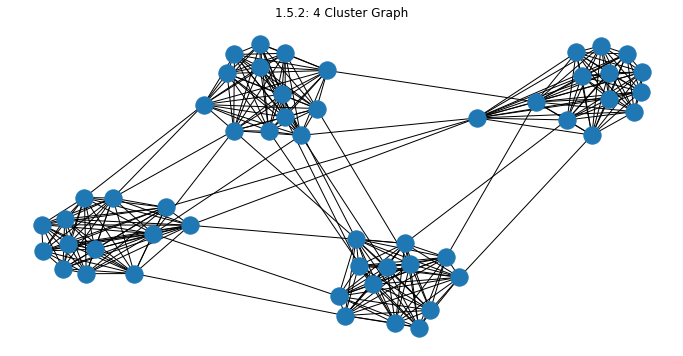

In [20]:
#50 is not divisible into 4 clusters so I used 52.
N = 52
clusters = 4
P_intra = 1
P_extra = 0.02

cluster_g = cluster_Graph( N, clusters, P_intra, P_extra )
G=nx.from_numpy_matrix(cluster_g.Matrix) #create graph from binary matrix

plt.figure(figsize=(12,6))
plt.title("1.5.2: 4 Cluster Graph")
nx.draw(G)

### Answer 1.5.3:
Let C be the connection probability function such that:
$C(n_1,n_2) = 
     \begin{cases}
       P_{intra}, &\quad \text{if }  n_1,n_2 \in C_i \\
       P_{extra}, &\quad \text{if }  n_1 \in C_i,n_2 \in C_j, i\neq j \\
     \end{cases}$
     
Then using our definition of sparseness,

$\mathop {\mathbb E}[\frac{L}{N^2}] = \frac{{\mathbb E}[L]}{N^2} $

Expressing the total number of connections (L) in terms of the connections each node makes within its cluster (excluding with itself) and with external nodes,
- $N-N_c$ is the number of external nodes, $N_c -1$ is the number of nodes in the cluster of the current node excluding itself.
- $n_c$ is any node within the same cluster, $n'$ is any node outside the cluster, n is the current node being iterated through
 
$\mathop =\frac{1}{N^2} \cdot{\mathbb E}  \bigg[ \sum_{n}^{N} \big( \sum_{n_c}^{N_c -1} C(n,n_c) 
                                       + \sum_{n'}^{N-N_c} C(n,n')  \big)           \bigg]   $
$=\frac{1}{N^2} \cdot{\mathbb E}  \bigg[ \sum_{n}^{N} \big( \sum_{n_c}^{N_c -1} P_{intra} 
                                       + \sum_{n'}^{N-N_c} P_{extra}  \big)           \bigg]   $
                                       
Note that in compliance with our sparseness definition, this expression will count every connection twice as it sums over the entire N
                                       
$=\frac{ N  \bigg[  \big( (N_c -1)\cdot P_{intra} 
                                       + (N-N_c)\cdot P_{extra}  \big) \bigg] }{N^2}$                                           $=\frac{\bigg[  \big( (N_c -1)\cdot P_{intra} 
                                       + (N-N_c)\cdot P_{extra}  \big) \bigg] }{N}$ = s




### Answer 1.5.4 and 1.5.5:

Given $s=0.1$ , $𝑃𝑖𝑛𝑡𝑟𝑎=1$ , $N$= 550, $N_c$ = 50,  find 𝑃𝑒𝑥𝑡𝑟𝑎 :

$s = 0.1 =\frac{\bigg[  \big( (N_c -1)\cdot P_{intra} 
                                       + (N-N_c)\cdot P_{extra}  \big) \bigg] }{N}$ 
     $=\frac{\bigg[  \big( (50 -1)\cdot 1 
                                       + (550-50)\cdot P_{extra}  \big) \bigg] }{550}$      
                                       
  $ 550 \cdot 0.1 - 49 = 500\cdot P_{extra} $
  
 $ P_{extra} = 0.012 $
  
  Note that if we did not discard the connection of each node with itself (an invalid connection) this result would be 0.01
                                       






100%|██████████| 300/300 [01:37<00:00,  3.07it/s]


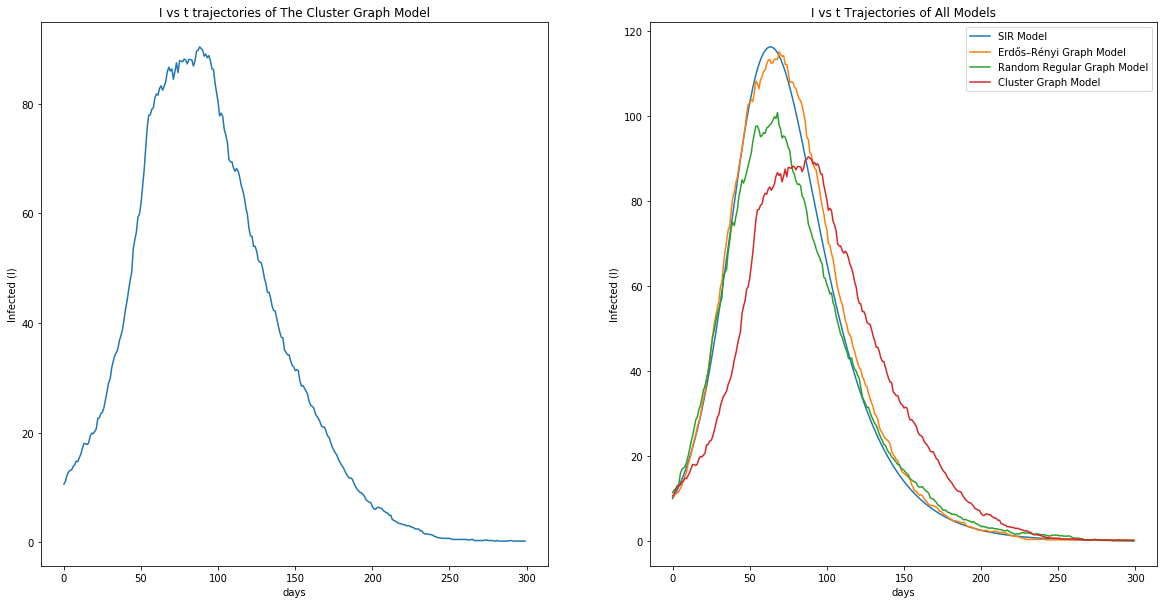

In [21]:
#1.5.4
#for this answer portion, I did not understand why there is a dt given, simulate_graph does not take it as input
N = 550
dt = 0.01
s = 0.1 
I0 = 10
tend = 300
clusters = 11
#R0 is not specified here so it is taken as 2.3, the same as in part 1.4
R0= 2.3

#Cluster Graph
G=nx.from_numpy_matrix(cluster_Graph(N, clusters , P_intra = 1, P_extra = 0.012).Matrix) #create graph from binary matrix

S_clusters, I_clusters = simulation_graph(G,I0,R0,sparsity=s,tend=tend ,modulation = False)
S_c_mean, I_c_mean = np.mean(S_clusters, axis=0), np.mean(I_clusters, axis=0)

#the previous graph models are run again with the new N:

#sparsely connected graphs
#Erdős–Rényi graph
G_ER = nx.erdos_renyi_graph(N, s)
#Random Regular graph
G_RR = nx.random_regular_graph(int(s*(N-1)), N,0) 

S_ER, I_ER = simulation_graph(G_ER,I0,R0,sparsity=s,tend=tend ,modulation = False)
S_ER, I_ER = np.mean(S_ER, axis=0), np.mean(I_ER, axis=0)

S_RR, I_RR = simulation_graph(G_RR,I0,R0,sparsity=s,tend=tend ,modulation = False)
S_RR, I_RR = np.mean(S_RR, axis=0), np.mean(I_RR, axis=0)

#to simulate sparsity in the SIR model, the R0 will be weighted by sparseness:
SIR = get_trajectory(gamma = 0.05, R0 = R0, I0 = I0, N = N , tend=tend)

time = np.arange(tend)

#using the variables and code from 1.4.5
figure154, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))

# the new cluster graph result will also be displayed on its own to make it easier to inspect
ax1.plot(time, I_c_mean)
ax1.set_xlabel("days")
ax1.set_ylabel("Infected (I)")
ax1.set_title('I vs t trajectories of The Cluster Graph Model')

ax2.plot(time, SIR[2][0::10], label="SIR Model")
ax2.plot(time, I_ER, label="Erdős–Rényi Graph Model")
ax2.plot(time, I_RR, label="Random Regular Graph Model")
ax2.plot(time, I_c_mean, label="Cluster Graph Model")
ax2.set_title('I vs t Trajectories of All Models')
ax2.set_xlabel("days")
ax2.set_ylabel("Infected (I)")
ax2.legend()


### Explanation for 1.5.5:

### Answer 1.5.6:

### Answer 1.5.7:

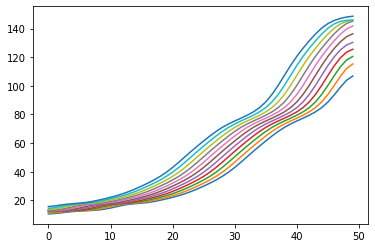

In [26]:
# Bonus 1.5.8
from scipy.ndimage.filters import gaussian_filter1d ## used to smooth the graph 
N = 550
tend = 300
clusters = 11
Nc = int(N/clusters)

graph= I_clusters[0]

for i in range(clusters): ## loop over clusters
    plt.plot(gaussian_filter1d(graph[i:i+Nc],2))
plt.show()

### Answer 1.5.8:

### Answer 1.5.9:
1 - By doubling the size of each cluster (doubling N without changing the number of clusters
2 - By doubling the number of clusters (doubling both N and the number of clusters)
3 - Any other combination of changes to N and cluster number such that cluster number changes at a different rate then N, causing smaller or larger clusters. Let's say 40 clusters of 25 nodes each.

100%|██████████| 300/300 [00:10<00:00, 27.39it/s] 


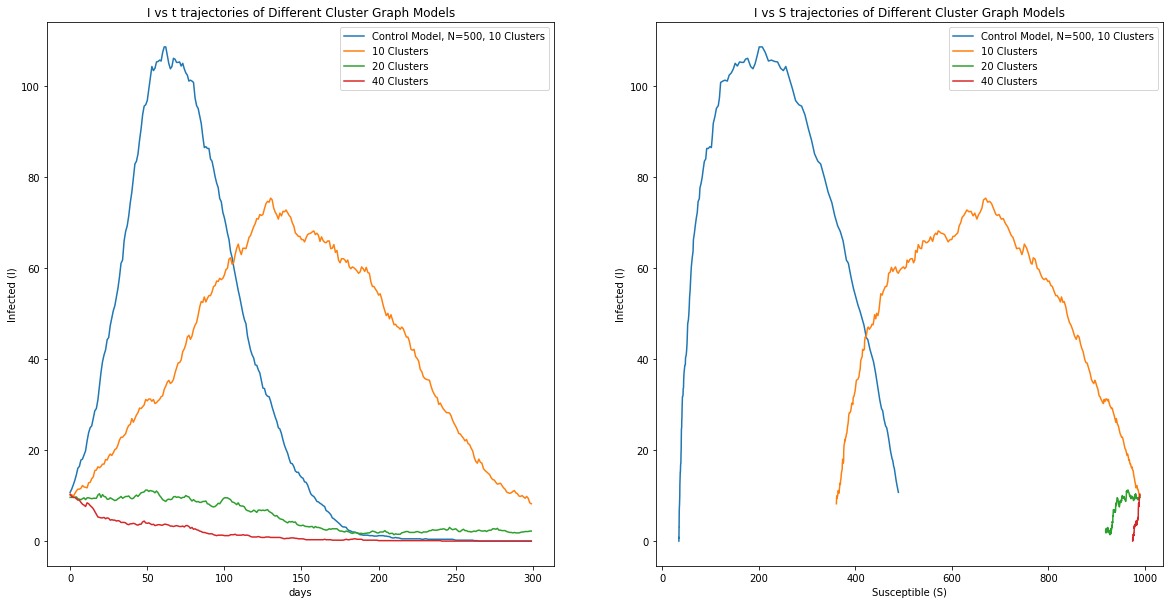

In [28]:
#since we want to double N from 500 to 1000, we start at a control model of N=500 with 10 clusters
s = 0.1 
I0 = 10
tend = 300
R0= 2.3

#0 Starting model: population 500, 10 clusters of 50 nodes
G0=nx.from_numpy_matrix(cluster_Graph(N=500, clusters=10 , P_intra = 1, P_extra = 0.012).Matrix)
S_c0, I_c0 = simulation_graph(G0,I0,R0,sparsity=s,tend=tend ,modulation = False)
S_m0, I_m0 = np.mean(S_c0, axis=0), np.mean(I_c0, axis=0)

#1 : population 1000, 10 clusters of 100 nodes - number of clusters kept the same
G1=nx.from_numpy_matrix(cluster_Graph(N=1000, clusters=10 , P_intra = 1, P_extra = 0.012).Matrix)
S_c1, I_c1 = simulation_graph(G1,I0,R0,sparsity=s,tend=tend ,modulation = False)
S_m1, I_m1 = np.mean(S_c1, axis=0), np.mean(I_c1, axis=0)

#2 : population 1000, 20 clusters of 50 nodes - number of clusters doubled
G2=nx.from_numpy_matrix(cluster_Graph(N=1000, clusters=20 , P_intra = 1, P_extra = 0.012).Matrix)
S_c2, I_c2 = simulation_graph(G2,I0,R0,sparsity=s,tend=tend ,modulation = False)
S_m2, I_m2 = np.mean(S_c2, axis=0), np.mean(I_c2, axis=0)

#3 : population 1000, 40 clusters of 25 nodes - number of clusters quadrupled
G3=nx.from_numpy_matrix(cluster_Graph(N=1000, clusters=40 , P_intra = 1, P_extra = 0.012).Matrix)
S_c3, I_c3 = simulation_graph(G3,I0,R0,sparsity=s,tend=tend ,modulation = False)
S_m3, I_m3 = np.mean(S_c3, axis=0), np.mean(I_c3, axis=0)

#Dsiplaying results:
time = np.arange(tend)

figure159, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))

# the new cluster graph result will also be displayed on its own to make it easier to inspect
ax1.plot(time, I_m0,label="Control Model, N=500, 10 Clusters")
ax1.plot(time, I_m1,label="10 Clusters")
ax1.plot(time, I_m2,label="20 Clusters")
ax1.plot(time, I_m3,label="40 Clusters")
ax1.set_xlabel("days")
ax1.set_ylabel("Infected (I)")
ax1.set_title('I vs t trajectories of Different Cluster Graph Models')
ax1.legend()

ax2.plot(S_m0, I_m0,label="Control Model, N=500, 10 Clusters")
ax2.plot(S_m1, I_m1,label="10 Clusters")
ax2.plot(S_m2, I_m2,label="20 Clusters")
ax2.plot(S_m3, I_m3,label="40 Clusters")
ax2.set_xlabel("Susceptible (S)")
ax2.set_ylabel("Infected (I)")
ax2.set_title('I vs S trajectories of Different Cluster Graph Models')
ax2.legend()

# PART 2: Hopfield Network

## Getting Started
As a start, we are going to create a Hopfield network of 25 Neurons with 4 random patterns stored. We will then set the initial state of the network to one of the patterns with some noise and finally run the network for some iterations.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# add random patterns to the list
pattern_list = factory.create_random_pattern_list(nr_patterns=4, on_probability=0.5)
plot_tools.plot_pattern_list(pattern_list)

# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(pattern_list[0], nr_of_flips=3)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=6)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")



## Exercise 2.1: Find the maximum noise tolerance in pattern recovery [6 points]
First we need to set the hopfield network and store some patterns. 

2.1.1. Create a hopfield network with 100 neurons and store 2 random patterns. [1 points]

2.1.2. Run the network for 6 steps after setting as initial state the first of the random patterns with 3 of its bits flipped. Calculate the final overlap with all the patterns. Report if the first pattern was recalled correctly by the network. \
Note: We say that the network has correctly recalled the pattern if the last state has overlap $\geq 0.99$ with the first pattern. [1 points]

2.1.3. Next task is to plot the accuracy of the network vs number of flipped bits. The accuracy is the ratio of trials in which the network correctly recalls a pattern, after the network has been initialized with the same pattern together but with some new noise. \
Note: As you may notice every run is slightly different due to the randomization of the initial noise. You can find the accuracy if you run the same network and patterns for 100 times (with new noise in every iteration) and find the ratio of trials in which the pattern was correctly recalled. [3 points]

2.1.4. Check how fast the accuracy curve drops depending on how many patterns we have stored. What do you believe is going to happen if we increase the number of patterns? (Answer this with one or two sentences). Plot the accuracy vs number of flipped bits curve for several patterns and finally check at which number of stored patterns the accuracy becomes unstable for even one flipped bit. \
Note: The maximum number of stored patterns can vary from simulation to simulation so just give an interval of $\pm 3$ patterns. [1 points] 

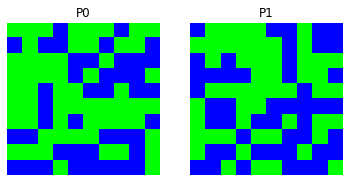

In [82]:
## 2.1.1
%matplotlib inline
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 10
number_of_patterns = 2

# create an instance of the class HopfieldNetwork
ex2_hopfield_net = network.HopfieldNetwork(pattern_size**2)

# Create the random patterns 
pattern_list = factory.create_random_pattern_list(nr_patterns=number_of_patterns, on_probability=0.5)


# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
plot_tools.plot_pattern_list(pattern_list)

# Update the weights so the hopfield learns the patterns
ex2_hopfield_net.store_patterns(pattern_list)




In [83]:
## 2.1.2
# Create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(pattern_list[0], nr_of_flips=3)
ex2_hopfield_net.set_state_from_pattern(noisy_init_state)

# From this initial state, let the network dynamics evolve.
states = ex2_hopfield_net.run_with_monitoring(nr_steps=6)


# Calculate the overlap and print if you have a recall
#??? # put your code here (You can use the method compute_overlap_list from module pattern_tools)


states_as_patterns = factory.reshape_patterns(states)
overlap = pattern_tools.compute_overlap_list(states_as_patterns[6],pattern_list)


if overlap[0]>=0.99:
    print('Predicted Correct')

Predicted Correct


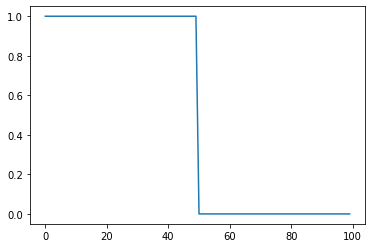

In [85]:
## 2.1.3
import matplotlib.pyplot as plt

# Create a function that has as input the hopfield network, the number of simulation repetitions 
# and the patterns and returns a list with an array with the number of flipped bits and the 
# the corresponding accuracy for that particular "noise level" (# flipped bits)
def accuracy_vs_flipped(hopfield_net, simulation_repetitions, pattern_list):
    hopfield_net.store_patterns(pattern_list)
    nr_of_flips = np.arange(hopfield_net.nrOfNeurons)
    accuracy = np.zeros_like(nr_of_flips) * 1.
    for flip in nr_of_flips:
        correct_trials = 0
        for sim in range(simulation_repetitions):
            
            # Create noise pattern and initialize network with it
            # put your code here
            noisy_init_state = pattern_tools.flip_n(pattern_list[0], nr_of_flips=flip)
            hopfield_net.set_state_from_pattern(noisy_init_state)
            
            # from this initial state, let the network dynamics evolve.
            states = ex2_hopfield_net.run_with_monitoring(nr_steps=6)
            states_as_patterns = factory.reshape_patterns(states)
            #Compute the overlap
            overlap = pattern_tools.compute_overlap(pattern_list[0],states_as_patterns[6])
            if overlap >= 0.99:
                correct_trials += 1
        accuracy[flip] = correct_trials/simulation_repetitions
    return nr_of_flips, accuracy

simulation_runs = 100
nr_of_flipped, accuracy = accuracy_vs_flipped(ex2_hopfield_net, simulation_runs, pattern_list)
# Plot the result

plt.plot(nr_of_flipped,accuracy)


Answer 2.1.4

15
19
100


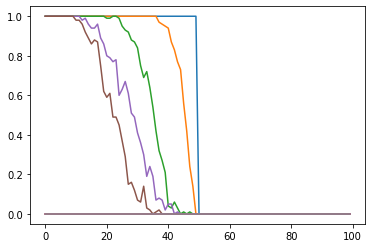

In [86]:
## 2.1.4 
# TODO
patterns_stored = [1, 2, 10,15,17,18,19, 100]

for pat in patterns_stored:
    # Create new patterns and store them in hopfield_net
    pattern_list = factory.create_random_pattern_list(nr_patterns=pat, on_probability=0.5)
    
    nr_of_flipped, accuracy = accuracy_vs_flipped(ex2_hopfield_net, simulation_runs, pattern_list)
    
    if accuracy[1]<0.99:
        print(pat)
    
    
    # Plot the result
    plt.plot(nr_of_flipped,accuracy)
    

# Hopfield Network Capacity [19 points]
In this part of the miniproject we will simulate the Hopfield network and numerically estimate its memory capacity with three different types of stimuli: non-random patterns, balanced random patterns (50% activity), and low-activity random patterns. **The size of the network will always be** $N=100$.

Before starting, it is recommended that you take a look at the example in the grey box in [section 17.2.4](https://neuronaldynamics.epfl.ch/online/Ch17.S2.html) in the book.

## Exercise 2.2: Capacity for non-random patterns: Alphabet [6 points]
We will use patterns in the shape of letters to exemplify non-random patterns. First we load 10 letters and create a list with all patterns.

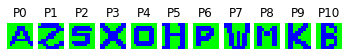

In [76]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools

# the letters we want to store in the hopfield network
letter_list = ['A', 'Z', 'S', 'X', 'O', 'H', 'P', 'W', 'M', 'K', 'B']
M = len(letter_list)

# create a list using Python's list comprehension syntax
abc_dictionary = pattern_tools.load_alphabet()
pattern_list = [abc_dictionary[key] for key in letter_list]
plot_tools.plot_pattern_list(pattern_list)

# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
N = pattern_shape[0]*pattern_shape[1]

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons=N)


Now evaluate the capacity of the network. The capacity is defined as $C = \frac{M_{max}}{N}$, where $M_{max}$ is the maximum number of patterns that can be correctly retrieved. To estimate the capacity, you must complete the following steps:

2.2.1. Complete the code for the function ``get_capacity``. This function should return a vector $\mathbf{c} \in \mathbb{R}^M$ where each element $c_i$ ($i=1,2, \dotsc, M$) is the number of of patterns retrieved correctly after first loading $i$ patterns into the network. [4 points]

  To determine if a pattern $\mu$ can be correctly retrieved:
   
  2.2.1.a. initialize the network in $\mu$ with a little noise (1%)
  
  2.2.1.b. run the network dynamics a few steps (3 steps)
  
  2.2.1.c. calculate the overlap between the last state of the network and pattern $\mu$
  
  2.2.1.d. if the overlap is $\geq 0.9$, we consider the pattern to have been correctly retrieved.


2.2.2. Plot the number of successfully retrieved patterns as a function of the number of loaded patterns. [1 points]

2.2.3. Using the plot in 2.2.2., calculate the capacity $C$. **Hint:** *Remember that $M_{max}$ is the maximum number of correctly retrievable patterns, which means the maximum value of $\mathbf{c}$. Use the ``Numpy`` function ``max()`` to find this value.* [1 points]

In [77]:
# 2.2.1
def get_capacity(hopfield_net,pattern_list,M):
    c = np.zeros((M,))
    
    for i in range(M):
        i_patterns = pattern_list[0:i+1]
        hopfield_net.store_patterns(i_patterns)
        nr_pattern_retrived = 0 
        for pattern in i_patterns:
            hopfield_net.set_state_from_pattern(pattern)
            states = hopfield_net.run_with_monitoring(nr_steps=3)
            states_as_patterns = factory.reshape_patterns(states)
            overlap = pattern_tools.compute_overlap(pattern,states_as_patterns[-1])
            
            if overlap >= 0.9:
                nr_pattern_retrived += 1
        c[i] = nr_pattern_retrived
                            
    return c

Text(0.5, 1.0, 'C = 0.05')

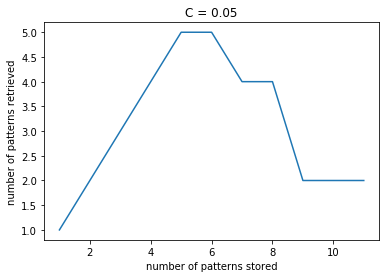

In [78]:
# 2.2.2 and 2.2.3
capacity = get_capacity(hopfield_net,pattern_list,M)
M_max = np.max(capacity)
C = M_max/N

# plot
fig, ax = plt.subplots()
ax.plot(np.arange(1,M+1), capacity)
ax.set_xlabel('number of patterns stored')
ax.set_ylabel('number of patterns retrieved')
ax.set_title('C = {}'.format(C))

## Exercise 2.3: Capacity for balanced random patterns [2 points]
We will now evaluate the capacity of the network with random patterns with 50% activity. As in the previous case, create a list of all patterns, and then evaluate the capacity with the function ``get_capacity`` (you can use exactly the same function that you defined above).

2.3.1 Plot the number of successfully retrieved patterns vs the number of stored patterns. [1 points]

2.3.2 Calculate $C$. **Hint:** *Remember that $M_{max}$ is the maximum number of correctly retrievable patterns, which means the maximum value of $\mathbf{c}$. Use the ``Numpy`` function ``max()`` to find this value.* [1 points]

Text(0.5, 1.0, 'C = 0.2')

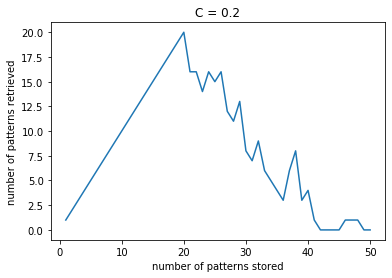

In [81]:
# 2.3
# create a list of patterns
M =  50
pattern_list = factory.create_random_pattern_list(nr_patterns=M, on_probability=0.5)

# calculate capacity
capacity = get_capacity(hopfield_net,pattern_list,M)
M_max = np.max(capacity)
C = M_max/N

# plot
fig, ax = plt.subplots()
ax.plot(np.arange(1,M+1), capacity)
ax.set_xlabel('number of patterns stored')
ax.set_ylabel('number of patterns retrieved')
ax.set_title('C = {}'.format(C))

## Exercise 2.4: Capacity for low-activity random patterns [11 points]
We now continue by evaluating the capacity of a Hopfield network with low-activity random patterns. To do this, we will diverge slightly from the textbook and use the Hopfield model proposed in the paper by [Tsodyks and Feigel'man (1988)](https://doi.org/10.1209/0295-5075/6/2/002). Given a neuron state $S_i \in \{ -1, 1 \}$, we first define the 0,1-state of the neuron $\sigma_i \in \{ 0, 1 \}$ as
    \begin{equation}
    \sigma_i = \frac{S_i + 1}{2}
    \end{equation}
and the state update function as
    \begin{equation}
    S_i(t+1) = \mathrm{sign} \left( \displaystyle \sum_j^N w_{ij} \sigma_j(t) - \theta \right)
    \end{equation}
where $w_{ij}$ are the synaptic weights and $\theta$ is the neural "firing threshold". Synaptic weights are set according to
    \begin{equation}
    w_{ij} = \frac{1}{a (1-a) N} \displaystyle \sum_\mu^M (\xi_i^\mu - a) (\xi_j^\mu - a)
    \end{equation}
where the patterns $\xi_i^\mu \in \{ 0, 1 \}$ have a probability $a$ of being 1 (this is called the activity or sparseness). This is essentially the regular Hebbian learning rule adjusted for the activity.

**Remember: there should be no self-connections:**
    \begin{equation}
    w_{ii} = 0 \quad \forall i
    \end{equation}

In this setting, the overlap between the network state and a pattern $\xi_i^\mu$ is calculated as
    \begin{equation}
    m^\mu = \frac{1}{a (1-a) N} \displaystyle \sum_i^N (\xi_i^\mu - a) \sigma_i
    \end{equation}
    
To simulate the low-activity Hopfield network, you must complete the following steps:

2.4.1. Complete the code for the new state update function called ``sparse_update_function``. This function must perform the calculation in the second equation above (+1 for numpy implementation). [1 + 1 points]

2.4.2. Complete the code for the new weight learning function called ``calculate_sparse_weights``. This function must perform the calculation in the third equation above (+1 for numpy implementation). [1 + 1 points]

2.4.3. Complete the code for the new overlap function called ``calculate_sparse_overlap``. This function must perform the calculation in the third equation above (+1 for numpy implementation). [1 + 1 points]

2.4.4. Complete the ``get_sparse_capacity`` function to use the new update function, new weight learning rule and the new overlap function. This function should return a vector $\mathbf{c} \in \mathbb{R}^M$ where each element $c_i$ ($i=1,2, \dotsc, M$) is the number of patterns retrieved correctly after first loading $i$ patterns into the network. [2 points]

**Clarification:** In the equations above, the state vector $\mathbf{S}$ is a vector with $N$ elements, one representing each neuron, so $\mathbf{S} \in \mathbb{R}^N$. The pattern vector $\boldsymbol{\xi}$ has the same shape, so $\boldsymbol{\xi} \in \mathbb{R}^N$. However, the patterns produced by ``pattern_tools`` has an $\sqrt{N} \times \sqrt{N}$ matrix shape. To use these patterns in the weight-learning formula, first flatten the pattern: ``ksi=pattern.flatten()``.

**Hint 1:** *``pattern_tools`` gives patterns in -1,+1-format. It needs to be changed to 0,1-format before using the formulas above.*

**Hint 2:** *The calculations in the equations above can be performed using dot products and outer products at the right places. First figure out how to do this, and then use the ``Numpy`` functions ``dot()`` and ``outer()``. This is much faster than looping through arrays.*

**Hint 3:** *To tell the network to use a new state update function, write ``hopfield_net.set_dynamics_to_user_function(update_function=sparse_update_function)``.*

**Hint 4:** *To manually insert a weight matrix into the network, write ``hopfield_net.weights=calculate_sparse_weights(...)``.*

**Hint 5:** *To set the diagonal of the weight matrix to zero ($w_{ii}=0$), use the ``Numpy`` function ``fill_diagonal()``.*

**Hint 6:** *To give the state update function a $\theta$-value, you need to set $\theta$ to the desired value outside the function and before you call the function. If this is done, you can use $\theta$ inside the update function like you normally would (without defining it inside the function). The update function will automatically use the value you used outside the function call. (This is a feature that the Python language has. If a variable has not been defined inside a function, it will use the variable value that is available outside the function.)*

Next, you need to estimate the capacity of the low-activity Hopfield network. To do this, you first need to optimize the threshold parameter $\theta$, i.e. find the $\theta$ that maximizes the storage capacity. **In the following exercises, when testing the capacity, you don't need to store more than 100 patterns. In other words, you can set this as the maximum number of patterns to store when testing the capacity of the network.**

2.4.5. Set $a=0.5$ and calculate the capacity $C$ like in the previous exercise for various threshold values $-1 \leq \theta \leq 1 $. Plot $C$ vs $\theta$. Which $\theta$ maximizes the capacity? [1 points]

2.4.6. Now set the activity to $a=0.1$ and then $a=0.05$. Again, for both these cases, calculate the capacity $C$ for various threshold values $-1 \leq \theta \leq 1 $ and plot $C$ vs $\theta$. How does the capacity $C$ of the low-activity networks compare to the balanced case of $a=0.5$? [2 points]

In [192]:
# 2.4.1

def sparse_update_function(S0, weights):
    N= np.shape(weights)
    delta = (S0 + 1)/2

    S1 = np.sign(weights.dot(delta) - theta)
    return S1


In [193]:
# 2.4.2
def calculate_sparse_weights(pattern_list, a):
    weight_matrix = np.zeros((N,N))
    for pattern in pattern_list:
        pattern = pattern.flatten()
        
        weight_matrix += 1/(a*(1-a)*N)* np.outer(pattern - a,pattern - a)
        
    np.fill_diagonal(weight_matrix,0)
    
        
    
    return weight_matrix


In [208]:
# 2.4.3
def calculate_sparse_overlap(S, pattern, a):
    delta = (np.array(S) + 1) / 2 
    print(np.size(delta))
    overlap = 1/(a*(1-a)*N) * np.dot(pattern-a,delta)
    
    return overlap

In [209]:
# 2.4.4
def get_sparse_capacity(hopfield_net,pattern_list,M,a,theta):
    
    
    c = np.zeros((M,))
    
    for i in range(M):
        i_patterns = pattern_list[0:i+1]
        nr_pattern_retrived = 0 
        
        hopfield_net.weights=calculate_sparse_weights(i_patterns, a)
        for pattern in i_patterns:
            hopfield_net.set_state_from_pattern(pattern)
            states = hopfield_net.run_with_monitoring(nr_steps=1)
            states_as_patterns = factory.reshape_patterns(states)
            flattened_state = states_as_patterns[-1].flatten()
            overlap = calculate_sparse_overlap(flattened_state,pattern,a)
            
            if overlap >= 0.9:
                nr_pattern_retrived += 1
        c[i] = nr_pattern_retrived
        
                 
    return c


In [ ]:
# 2.4.5 and 2.4.6
M = 5
pattern_size = 10
number_of_patterns = 2
N = pattern_size **2
a_vec = np.array([0.5, 0.1, 0.05])
a = 0.5

factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
pattern_list = factory.create_random_pattern_list(nr_patterns=M, on_probability=0.5)
for i in range(len(pattern_list)):
        pattern_list[i][pattern_list[i]==-1]= 0

plot_tools.plot_pattern_list(pattern_list)


C_vec = []
theta_vec = np.linspace(-1,1,num = 11)
for theta in theta_vec:
    hopfield_net = network.HopfieldNetwork(nr_neurons=N)
    hopfield_net.set_dynamics_to_user_function(update_function=sparse_update_function) 
    capacity = get_sparse_capacity(hopfield_net,pattern_list,M,a,theta)
    M_max = np.max(capacity)
    C_vec.append(M_max/N) 

# plot
C_vec = np.array(C_vec)
theta_vec = np.linspace(-1,1,num = 11)
fig, ax = plt.subplots()
ax.plot(theta_vec, C_vec.T)
ax.set_xlabel('neuronal threshold')
ax.set_ylabel('capacity')
ax.legend(a_vec)

In [ ]:
### Unfortunately, I was not able to fix the bugs in the code. Sorry :(

Answer 2.4.6.